In [1]:
import numpy as np, json, ast
from time import time
from sklearn.metrics.pairwise import cosine_similarity
from numpy import dot
from numpy.linalg import norm

In [2]:
def cosine_sim(a,b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
#     cos_sim = cosine_similarity(a,b)
    return cos_sim

In [3]:
with open('id_ques_map.json') as fh:
    id_ques_map = json.load(fh)
id_ques_map = {int(k):str(v) for k,v in  id_ques_map.items()}
id_ques_map[0] = ''

In [4]:
max(id_ques_map.keys())

537933

In [9]:
sent_embs = np.load('distilbert-base-nli-stsb-mean-tokens_sent_embeddings.npy')
sent_embs.shape

(537934, 768)

In [10]:
sent_embs = sent_embs[:100]

In [11]:
sims = {}
for row_ind in range(sent_embs.shape[0]):
    for col_ind in range(sent_embs.shape[0]):
        if row_ind < col_ind:
            row_vec = sent_embs[row_ind].reshape(1,-1)
            col_vec = sent_embs[col_ind].reshape(1,-1)
            cs = cosine_similarity(row_vec, col_vec)[0,0]
            sims[(row_ind,col_ind)] = cs

In [12]:
sims_mat = np.zeros((sent_embs.shape[0], sent_embs.shape[0]))

In [13]:
for row_ind in range(sent_embs.shape[0]):
    for col_ind in range(sent_embs.shape[0]):
        if row_ind == col_ind:
            s = 1
        elif row_ind < col_ind:
            s = sims[(row_ind,col_ind)]
        else:
            s = sims[(col_ind,row_ind)]
        sims_mat[row_ind,col_ind] = s

In [14]:
sims_mat.shape

(100, 100)

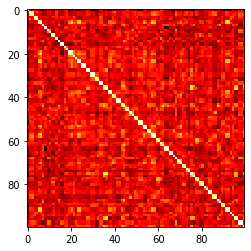

In [15]:
import matplotlib.pyplot as plt
import numpy as np

a = sims_mat
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()